In [113]:
# Import necessary packages.
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [166]:
# Solving for Least Squares with One Regressor (3.5)

## Construct a dataset consists of 20 pairs (Yi, Xi).
np.random.seed(101)
n = 20
X = np.random.uniform(0, 1, n) # X ~ U(0, 1)
Y = 3*X + np.random.normal(0, 1, n) # Y ~ N(3X, 1)

## Calculate the sum of squared error function given a parameter space of β
B = np.linspace(2, 4, 100) # Parameter space of β
sse = np.array([np.sum((Y - X*b)**2) for b in B])
β_hat = B[np.argmin(sse)]

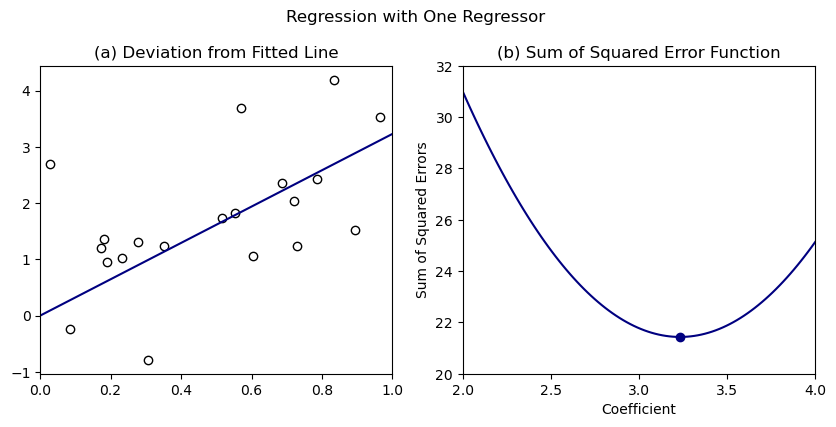

In [173]:
# Figure 3.1.

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle('Regression with One Regressor', y=1.02)

# (a) Deviation from Fitted Line
ax[0].scatter(X, Y, color='white', edgecolor='k')
ax[0].plot(np.linspace(0, 1, 100), β_hat*np.linspace(0, 1, 100), color='navy')
ax[0].set_title('(a) Deviation from Fitted Line')
ax[0].set_xmargin(0)

# (b) Sum of Squared Error Function
ax[1].plot(B, sse, color='navy')
ax[1].scatter(β_hat, sse[np.argmin(sse)], color='navy')
ax[1].set_title('(b) Sum of Squared Error Function')
ax[1].set_xmargin(0)
ax[1].set_ylim([20, 32])
ax[1].set_ylabel('Sum of Squared Errors')
ax[1].set_xlabel('Coefficient')
ax[1].set_xticks([2.0, 2.5, 3.0, 3.5, 4.0])

plt.show()

In [179]:
# Solving for Least Squares with Two Regressors

## Construct a dataset consists of 100 triples (Yi, X1i, X2i).
## The construction follows the code `figure3_2.R` of Hansen (2022).
np.random.seed(101)

n = 100 # number of observations
X = np.random.multivariate_normal(mean=[0, 0], 
                                  cov=[[1/4, -1/8], [-1/8, 1/4]], 
                                  size=n)
X1 = X[:, 0]
X2 = X[:, 1]
e = 2*np.random.normal(size=n)
Y = 3*X1 + 3*X2 + e

## Calculate the sum of squared error function given a parameter space of β
B1 = np.linspace(2, 4, 1000) # Parameter space of β1
B2 = np.linspace(2, 4, 1000) # Parameter space of β1

#sse = np.array([np.sum((Y - X1*b1 - X2*b2)**2) for b1 in B2 for b2 in B2])
#β1_hat = B[np.argmin(sse)]

TypeError: Axes3D.plot() missing 1 required positional argument: 'ys'

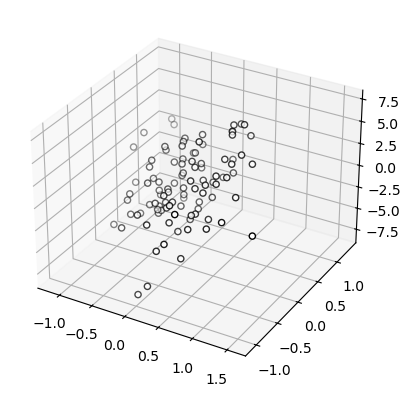

In [193]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
x_grid = np.meshgrid(x1, x2)

ax.scatter(X1, X2, Y, color='white', edgecolor='k')
ax.plot(x_grid)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

In [195]:
# Ordinary Least Squares Estimator of β

def beta_ols(Y, X):
    # Assume X is not ill-conditioned.
    return inv(X.T @ X) @ (X.T @ Y)

In [194]:
# Least Squares Residuals

def ols_residuals(Y, X):
    beta = beta_ols(Y, X)
    return Y - X @ beta

In [155]:
# Projection Matrix and Annihilator Matrix

def projection_matrix(X):
    """
    Return a projection matrix of given matrix form of regressors.
    """
    return X @ inv(X.T @ X) @ X.T

def annihilator_matrix(X):
    """
    Return an annihilator matrix of given matrix form of regressors.
    """
    return np.eye(len(X)) - X @ inv(X.T @ X) @ X.T

In [200]:
# Analysis of Variance

## Coefficient of determination; R-squared
def r_squared(Y, X):
    e_hat = ols_residuals(Y, X).reshape(-1, 1)
    Y_demeaned = Y - np.mean(Y)

    num = e_hat.T @ e_hat
    den = Y.T @ Y

    return num/den

In [156]:
# Leverage Values (3.19)

def leverage_values(P):
    return np.diag(P)

In [205]:
# Influential Observations
np.random.seed(101)

n = 25 # 25 observations of (Y, X)
X = np.random.uniform(1, 10, n) # X ~ U(1, 10)
Y = np.random.normal(X, 2) # Y ~ N(Xi, 4)
Xf = np.append(X, 9)
Yf = np.append(Y, 0)

## Add a column of intercept to each dataset.
Xc = np.concatenate([X.reshape(-1, 1), np.ones(n).reshape(-1, 1)], axis=1)
Xcf = np.concatenate([Xf.reshape(-1, 1), np.ones(n+1).reshape(-1, 1)], axis=1)

b1_loo, b0_loo = beta_ols(Y, Xc) # Leave-One-Out OLS
b1_fs, b0_fs = beta_ols(Yf, Xcf) # Full Sample OLS

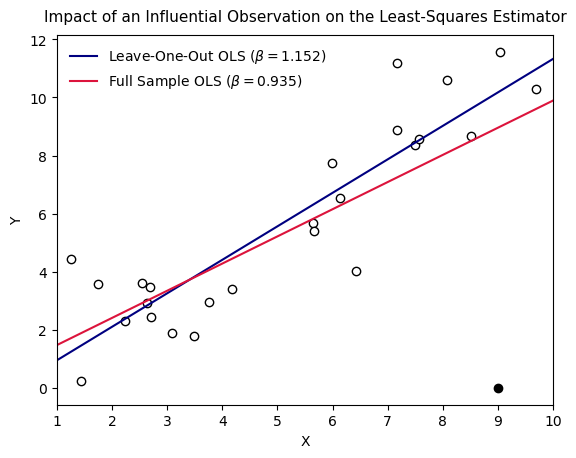

In [206]:
fig, ax = plt.subplots()

x_grid = np.linspace(1, 10, 100)

ax.scatter(X, Y, color='white', edgecolor='k')
ax.scatter(9, 0, color='k') # an outlier
ax.plot(x_grid, b1_loo*x_grid+b0_loo, color='navy', label=rf'Leave-One-Out OLS ($\beta = {b1_loo:.3f}$)') # Leave-One-Out OLS
ax.plot(x_grid, b1_fs*x_grid+b0_fs, color='crimson', label=rf'Full Sample OLS ($\beta = {b1_fs:.3f}$)')   # Full Sample OLS

ax.set_title('Impact of an Influential Observation on the Least-Squares Estimator', pad=10, fontsize=11)
ax.legend(frameon=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([1, 10])
ax.set_xmargin(0)

plt.show()

In [208]:
P = projection_matrix(Xc)
h = leverage_values(P)

In [202]:
r_squared(Y, Xc)

array([[0.05059124]])